## Factors that influence the picture detection using Amazon Texture


<font size="3"><font color='grey'>by Group 5 Esther Cheng, Ruolan Lin, Kristina Gong, Christina Ding, Zhen Wu | on 28 Nov 2021 </font></font>

Nowadays, we live in a digital world and often encounter fragmented information. Pictures seem to become the dominant media for delivering information.  However, comprehending words in pictures may not be an easy task since the words may not be in a good formating style or the image could be fuzzy. Therefore, we think it would be convenient to have computers help us read the words in the images and output an articulate text file. After we learned some machine learning services offered by AWS in QTM 350, we decide to use Textract as our solution. Among all the parameters in Textract, we especially like to find whether the background color and image pixel have impacts on the confidence level for detecting words. 
We start with an overview of the importance of the problem, the Amazon Web Services [Amazon Textract](https://docs.aws.amazon.com/textract/latest/dg/what-is.html), explain how it works, and then discuss the results we found. 


## Hypothesis


We hypothesize that 
1. Different colors have effect on word detecting;
2. As the RGB difference (the RGB code difference between words' color and standard color - we set it to be 145 for all three colors) increases, the confidence level for detecting words decreases;
3. As the pixel increases, the confidence level increases as well.

## Amazon Textract Picture Detection Overview


Amazon Textract is a machine learning service that automatically extracts text, handwriting, and data from scanned documents that goes beyond simple optical character recognition to identify and extract data from forms and tables. Many companies today manually extract data from scanned documents such as PDFs, images, tables, and forms, or through simple OCR software that requires manual configuration which oftentimes requires reconfiguration when the form changes. To overcome these manual and expensive processes, Textract uses machine learning to read and process any type of document, accurately extracting text, handwriting, tables, and other data without any manual effort. One can quickly automate document processing and take action on the information extracted whether it be automating loans processing or extracting information from invoices and receipts. Textract can extract the data in minutes vs. hours or days. Additionally, one can add in human reviews with Amazon Augmented AI to provide oversight of your models and perform reviews for sensitive data. 

Textract can be used in many different cases such as financial services, healthcare and life sciences, and the public sector. In finance, textract can accurately extract critical business data such as mortgage rates, applicant names, and invoice totals across a variety of financial forms like mortgage applications, invoices, and more to process loan and mortgage applications in minutes. In healthcare, textract can help better serve the patients and insurers by extracting important patient data from health intake forms, insurance claims, and pre-authorization forms. It helps keep data organized and in its original context, and eliminates manual review of output. In the public sector, textract easily extracts relevant data from government-related forms like small business loans, federal tax forms, or business applications with a high degree of accuracy.

![picture](https://d1.awsstatic.com/Get-Cloud/Textract/product-page-diagram_Textract%402x.639922faebc8f38f768e38c3f620cc32725e8b0e.png)



## Data Collection and Preparation

We used the function of RGB Color Codes Chart on the [website](https://www.rapidtables.com/)  to find the colors we wanted for the text and background. Here, I will take the blue one as an example. Initially, I set the code for Red and Green to 0 and Blue to 150. Then, I fetched the color and set the color for the first Monday text. Afterward, I increased the code for Blue by 5 each time for 20 times until it reached 250 and used the colors for the other Monday texts. Now, I have 21 words with different blues whose code ranges from 150 to 250 with an increment of 5. To be exact, the colors had the Blue codes 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, and 250. Next, I increased the code for Blue by 5 again to reach 255 and used that as the background color. Arranging the 21 words on the same page, I took a screenshot of the data and saved it as a PNG file. While I was using a MacBook, I could easily change the pixel of the image through image editing. The initial pixel was 144px so that I set the second picture's pixel to 130. Then, I decreased the pixel values by 10 each time for 10 times until it reached 30 and saved the 12 pictures. The final picture pixels were 144, 130, 120, 110, 100, 90, 80, 70, 60, 50, 40, and 30. Finally, I repeated the same process for Green and Red by setting the other two RGB colors to 0, changing code for the desired colors, and modifying the pixel for each picture.



We show some examples of our pictures below.

![Blue Background with 144 pixel](https://project-group5.s3.amazonaws.com/blue-pixel144.png)





![Red Background with 144 pixel](https://project-group5.s3.amazonaws.com/red-pixel144.png)

![Green Background with 144 pixel](https://project-group5.s3.amazonaws.com/green-pixel144.png)

We name the pictures in the form of "$color$-pixel$pixel\_value$.png". For example, "red-pixel120.png" is the picture with red background and pixel value being 120. Then, we created an S3 bucket, named "project-group5-k", and put all 36 pictures into the bucket so that we can proceed to extract texts from them using Textract.

## Architecture

Here is the Architecture diagram for our project.
![Architecture](https://example-350.s3.amazonaws.com/architecture.jpg)

## How it works


In [ ]:
!aws s3 ls project-group5-k

2021-11-25 23:21:54      40949 blue-pixel100.png
2021-11-25 23:21:54      46282 blue-pixel110.png
2021-11-25 23:21:54      51604 blue-pixel120.png
2021-11-25 23:21:54      58082 blue-pixel130.png
2021-11-25 23:21:54      50925 blue-pixel144.png
2021-11-25 23:21:54      10737 blue-pixel30.png
2021-11-25 23:21:54      13302 blue-pixel40.png
2021-11-25 23:21:54      17797 blue-pixel50.png
2021-11-25 23:21:54      22235 blue-pixel60.png
2021-11-25 23:21:54      27673 blue-pixel70.png
2021-11-25 23:21:54      30455 blue-pixel80.png
2021-11-25 23:21:54      35668 blue-pixel90.png
2021-11-25 23:21:54      50530 green-pixel100.png
2021-11-25 23:21:54      57215 green-pixel110.png
2021-11-25 23:21:54      64292 green-pixel120.png
2021-11-25 23:21:54      72898 green-pixel130.png
2021-11-25 23:21:54      63741 green-pixel144.png
2021-11-25 23:21:54      12454 green-pixel30.png
2021-11-25 23:21:54      16350 green-pixel40.png
2021-11-25 23:21:54      21193 green-pixel50.png
2021-11-25 23:21:54   

In [ ]:
import boto3

In [ ]:
textract = boto3.client('textract')

We create three dataframes (for background color red, blue, and green) to store the confidence scores for different pixel levels and RGB differences below.

In [ ]:
import numpy as np
array = np.zeros((21,12))
array
import pandas as pd
df = pd.DataFrame(array, columns = ['144','130','120','110','100','90','80','70','60','50','40','30'])
redDF = df.copy()
greenDF = df.copy()
blueDF = df.copy()

Here we create a list of image names in the bucket.

In [ ]:
s3_resource = boto3.resource('s3')
my_bucket = s3_resource.Bucket('project-group5-k')
summaries = my_bucket.objects.all()
images = []
for image in summaries:
    images.append(image.key)

## Create three lists of image names for images with differnet background color

We extract the list of image names with the red background:

In [ ]:
red_unorder = []
for image in images:
    if image.startswith('red'):
        red_unorder.append(image)
red = red_unorder[5:] + red_unorder[:5]
red.reverse()
red

['red-pixel144.png',
 'red-pixel130.png',
 'red-pixel120.png',
 'red-pixel110.png',
 'red-pixel100.png',
 'red-pixel90.png',
 'red-pixel80.png',
 'red-pixel70.png',
 'red-pixel60.png',
 'red-pixel50.png',
 'red-pixel40.png',
 'red-pixel30.png']

We extract the list of image names with green background:

In [ ]:
green_unorder = []
for image in images:
    if image.startswith('green'):
        green_unorder.append(image)
green = green_unorder[5:] + green_unorder[:5]
green.reverse()
green

['green-pixel144.png',
 'green-pixel130.png',
 'green-pixel120.png',
 'green-pixel110.png',
 'green-pixel100.png',
 'green-pixel90.png',
 'green-pixel80.png',
 'green-pixel70.png',
 'green-pixel60.png',
 'green-pixel50.png',
 'green-pixel40.png',
 'green-pixel30.png']

We extract the list of image names with blue background:

In [ ]:
blue_unorder = []
for image in images:
    if image.startswith('blue'):
        blue_unorder.append(image)
blue = blue_unorder[5:] + blue_unorder[:5]
blue.reverse()
blue

['blue-pixel144.png',
 'blue-pixel130.png',
 'blue-pixel120.png',
 'blue-pixel110.png',
 'blue-pixel100.png',
 'blue-pixel90.png',
 'blue-pixel80.png',
 'blue-pixel70.png',
 'blue-pixel60.png',
 'blue-pixel50.png',
 'blue-pixel40.png',
 'blue-pixel30.png']

## Put confidence levels of textracts into the three dataframes

We loop through the characters of different pixel values in each image from the list with red background, apply textract to the image, and put the results in the dataframe we created.

In [ ]:
col = 0
for image in red:
    response = textract.detect_document_text(
        Document={
            'S3Object': {
                'Bucket': "project-group5-k",
                'Name': image
            }
        })
    row = 0
    for item in response['Blocks']:
        if item['BlockType']=='LINE':
            redDF.iloc[row,col] = item['Confidence']
            row += 1
    col += 1
redDF

,144,130,120,110,100,90,80,70,60,50,40,30
0,99.920830,99.930504,13.772729,99.916855,99.855927,0.0,99.364815,9.687783,99.366623,96.972672,86.8881,0.0
1,99.920967,99.911827,23.784285,99.917961,99.911407,0.0,99.365387,0.000000,99.366425,99.354103,0.0000,0.0
2,99.907089,99.903061,24.521917,99.929932,99.894539,0.0,99.349670,0.000000,99.356544,99.355530,0.0000,0.0
3,99.878601,99.909798,27.665478,99.899467,99.879738,0.0,99.365807,0.000000,99.231010,99.213257,0.0000,0.0
4,99.895409,99.905380,24.613583,99.906754,99.826851,0.0,99.291702,0.000000,99.292313,99.221092,0.0000,0.0
5,99.899971,99.920357,25.144709,99.913918,99.876442,0.0,99.122795,0.000000,99.602028,99.301216,0.0000,0.0
6,99.846802,99.902824,0.000000,99.907890,99.903786,0.0,99.365288,0.000000,98.986977,99.159325,0.0000,0.0
7,99.899231,99.881821,0.000000,99.890366,99.866196,0.0,99.039200,0.000000,98.544594,85.328362,0.0000,0.0
8,99.884590,99.889687,0.000000,99.912910,99.861931,0.0,99.153152,0.000000,99.185997,0.000000,0.0000,0.0
9,99.896690,99.890915,0.000000,99.904381,99.891434,0.0,99.298065,0.000000,98.258820,0.000000,0.0000,0.0


We loop through the characters of different pixel values in each image from the list with green background, apply textract to the image, and put the results in the dataframe we created.

In [ ]:
col = 0
for image in green:
    response = textract.detect_document_text(
        Document={
            'S3Object': {
                'Bucket': "project-group5-k",
                'Name': image
            }
        })
    row = 0
    for item in response['Blocks']:
        if item['BlockType']=='LINE':
            greenDF.iloc[row,col] = item['Confidence']
            row += 1
    col += 1
greenDF

,144,130,120,110,100,90,80,70,60,50,40,30
0,99.698792,99.650726,99.751610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.147293
1,99.714806,99.482773,99.137512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,99.804504,99.098907,99.571266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,99.810410,98.864380,99.642250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,99.745491,99.565651,99.620720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,99.824326,99.087830,99.726753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,99.761452,98.955658,99.591797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,99.837181,98.774078,99.493553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,99.801926,99.256546,98.626480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,99.769226,99.559708,98.989807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


We loop through the characters of different pixel values in each image from the list with blue background, apply textract to the image, and put the results in the dataframe we created.

In [ ]:
col = 0
for image in blue:
    response = textract.detect_document_text(
        Document={
            'S3Object': {
                'Bucket': "project-group5-k",
                'Name': image
            }
        })
    row = 0
    for item in response['Blocks']:
        if item['BlockType']=='LINE':
            blueDF.iloc[row,col] = item['Confidence']
            row += 1
    col += 1
blueDF

,144,130,120,110,100,90,80,70,60,50,40,30
0,99.754379,99.690659,99.741791,99.612083,99.593277,99.599152,99.555931,99.479652,0.0,85.736008,0.0,0.0
1,99.770584,99.780449,99.760284,99.785576,99.393585,99.715446,99.271873,99.717575,0.0,0.000000,0.0,0.0
2,99.859329,99.817520,99.434105,99.351555,99.116287,98.657547,95.573875,98.999313,0.0,0.000000,0.0,0.0
3,99.795898,99.776825,99.697502,99.573570,99.358215,96.964195,94.414604,99.011795,0.0,0.000000,0.0,0.0
4,99.730888,99.814362,99.566559,99.393509,98.771011,95.653473,0.000000,97.286713,0.0,0.000000,0.0,0.0
5,99.729660,99.607712,99.270638,98.716911,98.815468,0.000000,0.000000,93.080925,0.0,0.000000,0.0,0.0
6,99.686104,99.348602,97.661827,94.307365,92.220261,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
7,99.674171,97.125183,87.874901,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
8,99.419945,85.784630,31.951445,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
9,99.414635,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0


## Put the dataframes into a clearer format

We put the dataframes of red background in a clearer table with different variables (RGB difference, pixel value, confidence value).

In [ ]:
array = np.zeros((252,4))
redData = pd.DataFrame(array, columns = ['RGB difference', 'pixel value', 'confidence',"color"])
row = 0
for i in range(len(redDF)):
    for j in range(len(redDF.iloc[0])):
        rgbDiff = (i+1)*5
        pixel = redDF.columns[j]
        confidence = redDF.iloc[i,j]
        color = "red"
        redData.iloc[row] = [rgbDiff, pixel, confidence, color]
        row += 1
redData["index"] = redData.index
redData["pixel value"] = pd.to_numeric(redData["pixel value"])
redData

,RGB difference,pixel value,confidence,color,index
0,5.0,144,99.920830,red,0
1,5.0,130,99.930504,red,1
2,5.0,120,13.772729,red,2
3,5.0,110,99.916855,red,3
4,5.0,100,99.855927,red,4
...,...,...,...,...,...
247,105.0,70,0.000000,red,247
248,105.0,60,0.000000,red,248
249,105.0,50,0.000000,red,249
250,105.0,40,0.000000,red,250


We put the dataframes of green background in a clearer table with different variables (RGB difference, pixel value, confidence value).

In [ ]:
array = np.zeros((252,3))
greenData = pd.DataFrame(array, columns = ['RGB difference', 'pixel value', 'confidence'])
row = 0
for i in range(len(greenDF)):
    for j in range(len(greenDF.iloc[0])):
        rgbDiff = (i+1)*5
        pixel = greenDF.columns[j]
        confidence = greenDF.iloc[i,j]
        greenData.iloc[row] = [rgbDiff, pixel, confidence]
        row += 1
greenData["index"] = greenData.index
greenData["pixel value"] = pd.to_numeric(greenData["pixel value"])
greenData

,RGB difference,pixel value,confidence,index
0,5.0,144,99.698792,0
1,5.0,130,99.650726,1
2,5.0,120,99.751610,2
3,5.0,110,0.000000,3
4,5.0,100,0.000000,4
...,...,...,...,...
247,105.0,70,0.000000,247
248,105.0,60,0.000000,248
249,105.0,50,0.000000,249
250,105.0,40,0.000000,250


We put the dataframes of blue background in a clearer table with different variables (RGB difference, pixel value, confidence value).

In [ ]:
array = np.zeros((252,3))
blueData = pd.DataFrame(array, columns = ['RGB difference', 'pixel value', 'confidence'])
row = 0
for i in range(len(blueDF)):
    for j in range(len(blueDF.iloc[0])):
        rgbDiff = (i+1)*5
        pixel = blueDF.columns[j]
        confidence = blueDF.iloc[i,j]
        blueData.iloc[row] = [rgbDiff, pixel, confidence]
        row += 1
blueData["index"] = blueData.index
blueData["pixel value"] = pd.to_numeric(blueData["pixel value"])
blueData

,RGB difference,pixel value,confidence,index
0,5.0,144,99.754379,0
1,5.0,130,99.690659,1
2,5.0,120,99.741791,2
3,5.0,110,99.612083,3
4,5.0,100,99.593277,4
...,...,...,...,...
247,105.0,70,0.000000,247
248,105.0,60,0.000000,248
249,105.0,50,0.000000,249
250,105.0,40,0.000000,250


## Explore the data with visualizations

We first create a scatterplot with RGB difference on the x axis and confidence level of textract on the y axis. Images with red background are marked as red, images with blue background are marked as blue, and images with green backgrounds are marked as green.

Text(0.5, 1.0, 'full scatterplot of confidence vs RGB difference')

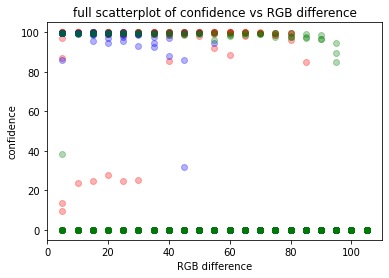

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(redData["RGB difference"],redData["confidence"],"o",color = "red", alpha = 0.3)

plt.plot(blueData["RGB difference"],blueData["confidence"],"o",color = "blue", alpha = 0.3)

plt.plot(greenData["RGB difference"],greenData["confidence"],"o",color = "green", alpha = 0.3)

plt.xlabel("RGB difference")
plt.ylabel("confidence")
plt.title("full scatterplot of confidence vs RGB difference")


We zoomed in a little on the scatterplot to look at the characters in the images where textract have a confidence level greater than or equal to 80.

Text(0.5, 1.0, 'scatterplot of confidence vs RGB difference zoomed in on the 80% to 100% confi')

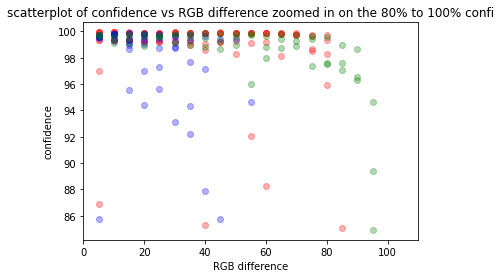

In [ ]:
plt.plot(redData[redData["confidence"]>=80]["RGB difference"],redData[redData["confidence"]>=80]["confidence"],"o",color = "red", alpha = 0.3)

plt.plot(blueData[blueData["confidence"]>=80]["RGB difference"],blueData[blueData["confidence"]>=80]["confidence"],"o",color = "blue", alpha = 0.3)

plt.plot(greenData[greenData["confidence"]>=80]["RGB difference"],greenData[greenData["confidence"]>=80]["confidence"],"o",color = "green", alpha = 0.3)


plt.xlim([0, 110])
plt.xlabel("RGB difference")
plt.ylabel("confidence")
plt.title("scatterplot of confidence vs RGB difference zoomed in on the 80% to 100% confi")

We put a regression line for each of the three background color on the subset of characters in the image where textract have a above 80% confidence level.

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

Text(0.5, 1.0, 'scatterplot of confidence vs RGB difference zoomed in on the 80% to 100% confi')

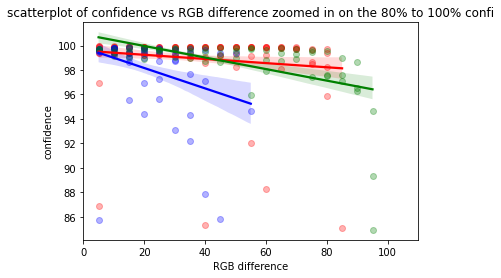

In [ ]:

sns.regplot(redData[redData["confidence"]>=80]["RGB difference"],redData[redData["confidence"]>=80]["confidence"],scatter_kws={'alpha':0.3}, color = "red", ci = 68)

sns.regplot(blueData[blueData["confidence"]>=80]["RGB difference"],blueData[blueData["confidence"]>=80]["confidence"], scatter_kws={'alpha':0.3}, color = "blue", ci = 68)

sns.regplot(greenData[greenData["confidence"]>=80]["RGB difference"],greenData[greenData["confidence"]>=80]["confidence"], scatter_kws={'alpha':0.3}, color = "green", ci = 68)

plt.xlim([0, 110])
plt.xlabel("RGB difference")
plt.ylabel("confidence")
plt.title("scatterplot of confidence vs RGB difference zoomed in on the 80% to 100% confi")

As we can see, the confidence level of textract under a blue background drops the quickest as RGB difference becomes larger. In green background the confidence level drops slower. While in a red background, the confidence level drops the slowest. As RGB difference increases in a red background, the confidence level of textract does not decrease very much.

Next, we do the same thing for pixel level. We create a scatterplot with pixel level on the x axis and confidence level of textract on the y axis. The color of the dots represent the color of the background of the character in the image.

Text(0.5, 1.0, 'full scatterplot of confidence vs pixel value')

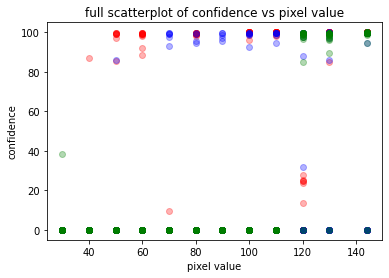

In [ ]:
plt.plot(redData["pixel value"],redData["confidence"],"o",color = "red", alpha = 0.3)
plt.plot(blueData["pixel value"],blueData["confidence"],"o",color = "blue", alpha = 0.3)
plt.plot(greenData["pixel value"],greenData["confidence"],"o",color = "green", alpha = 0.3)
plt.xlabel("pixel value")
plt.ylabel("confidence")
plt.title("full scatterplot of confidence vs pixel value")

Interestingly, in a green background, textract seems to require a higher pixel to become confident in recognizing word than in blue or red background. On the left hand side of the plot where the pixel level is low, the green dots are all on the bottom of the plot meaning textract have 0 confidence in recognizing the word in the picture. In red background, on the other hand, textract can be confident to recognize the words even with a low pixel level. Textract seems to perform best in red background.

We also zoom in on the above 80% confidence part.

Text(0.5, 1.0, 'full scatterplot of confidence vs pixel value zoomed in on the 80% to 100% confidence')

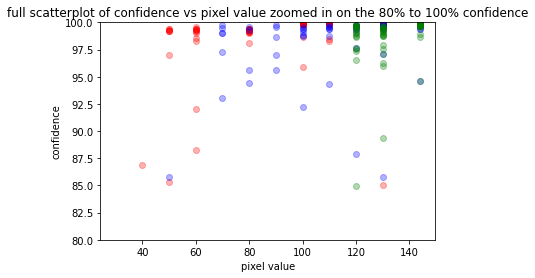

In [ ]:
plt.plot(redData["pixel value"],redData["confidence"],"o",color = "red", alpha = 0.3)
plt.plot(blueData["pixel value"],blueData["confidence"],"o",color = "blue", alpha = 0.3)
plt.plot(greenData["pixel value"],greenData["confidence"],"o",color = "green", alpha = 0.3)
plt.ylim([80, 100])
plt.xlabel("pixel value")
plt.ylabel("confidence")
plt.title("full scatterplot of confidence vs pixel value zoomed in on the 80% to 100% confidence")

And then, we put a regression line for each of the three background color onto the above 80% confidence part.

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

Text(0.5, 1.0, 'full scatterplot of confidence vs pixel value zoomed in on the 80% to 100% confidence')

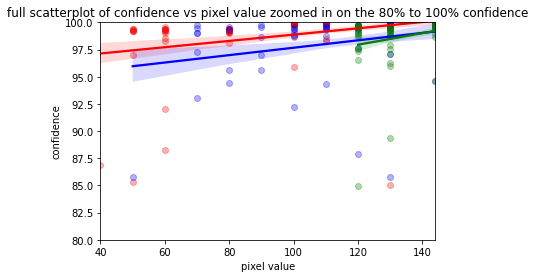

In [ ]:

sns.regplot(redData[redData["confidence"]>=80]["pixel value"],redData[redData["confidence"]>=80]["confidence"], scatter_kws={'alpha':0.3}, color = "red", ci = 68)

sns.regplot(blueData[blueData["confidence"]>=80]["pixel value"],blueData[blueData["confidence"]>=80]["confidence"], scatter_kws={'alpha':0.3}, color = "blue", ci = 68)

sns.regplot(greenData[greenData["confidence"]>=80]["pixel value"],greenData[greenData["confidence"]>=80]["confidence"], scatter_kws={'alpha':0.3}, color = "green", ci = 68)

plt.ylim([80, 100])
plt.xlabel("pixel value")
plt.ylabel("confidence")
plt.title("full scatterplot of confidence vs pixel value zoomed in on the 80% to 100% confidence")

From the plot we can see that the slope of the regression lines are rougly the same, meaning that an increase in pixel level leads to almost the same increase in confidence in the three color backgrounds. However, textract does perform the best in red background as the line for red background is above the other two lines.

## Anova test for background color

We collect the `redData`, `blueData`, `greenData` into a singe dataframe. And then we do an anova test to see if the background color have an impact on the confidence level of textract.

In [ ]:
df_all = pd.concat([redData,blueData,greenData])

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('confidence ~ C(color) + C(index)', data=df_all).fit()
print(sm.stats.anova_lm(model))
print(model.summary())

             df         sum_sq       mean_sq          F        PR(>F)
C(color)    2.0   47929.068275  23964.534138  18.004192  2.809204e-08
C(index)  251.0  770301.136263   3068.928830   2.305640  1.333302e-15
Residual  502.0  668188.631241   1331.053050        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:             confidence   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     2.430
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.76e-17
Time:                        02:06:01   Log-Likelihood:                -3637.2
No. Observations:                 756   AIC:                             7782.
Df Residuals:                     502   BIC:                             8958.
Df Model:                         253                                         
Covarianc

## Regression results for the three background colors

We do regressions of confidence level on RGB difference and pixel value for red background color. Here are the results.

In [ ]:
xRed = redData[['RGB difference', 'pixel value']]
yRed = redData[['confidence']]
# use sklearn
from sklearn import linear_model
redReg = linear_model.LinearRegression()
redReg.fit(xRed, yRed)
print(redReg.coef_)
print(redReg.intercept_)
# use sm to get p values
import statsmodels.api as sm
xRed2 = sm.add_constant(xRed)
redOLS = sm.OLS(yRed.astype(float), xRed2.astype(float))
redOLS2 = redOLS.fit()
print(redOLS2.summary())

[[-0.71723105  0.54318545]]
[32.55103456]
                            OLS Regression Results                            
Dep. Variable:             confidence   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     70.65
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           4.97e-25
Time:                        02:06:02   Log-Likelihood:                -1276.5
No. Observations:                 252   AIC:                             2559.
Df Residuals:                     249   BIC:                             2570.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
co

We do regressions of confidence level on RGB difference and pixel value for green background color. 

In [ ]:
xGreen = greenData[['RGB difference', 'pixel value']]
yGreen = greenData[['confidence']]

# use sm to get p values
xGreen2 = sm.add_constant(xGreen)
greenOLS = sm.OLS(yGreen.astype(float), xGreen2.astype(float))
greenOLS2 = greenOLS.fit()
print(greenOLS2.summary())

                            OLS Regression Results                            
Dep. Variable:             confidence   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     127.6
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           6.96e-39
Time:                        02:06:02   Log-Likelihood:                -1205.9
No. Observations:                 252   AIC:                             2418.
Df Residuals:                     249   BIC:                             2428.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -40.5975      5.871     -6.

We do regressions of confidence level on RGB difference and pixel value for blue background color. 

In [ ]:
xBlue = blueData[['RGB difference', 'pixel value']]
yBlue = blueData[['confidence']]

# use sm to get p values
xBlue2 = sm.add_constant(xBlue)
blueOLS = sm.OLS(yBlue.astype(float), xBlue2.astype(float))
blueOLS2 = blueOLS.fit()
print(blueOLS2.summary())

                            OLS Regression Results                            
Dep. Variable:             confidence   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.08e-41
Time:                        02:06:02   Log-Likelihood:                -1199.6
No. Observations:                 252   AIC:                             2405.
Df Residuals:                     249   BIC:                             2416.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             27.7719      5.726      4.

## Conclusion

From the scatter plots for green, red, and blue colors, we can observe some potential linear trends, which drive us to establish models for statistical analysis. Based on the visualization result. Our preliminary hypothesis is that the larger the RGB difference, the smaller the confidence level and the larger the pixel value, the larger the confidence level. After the regression analysis, from the graphs, we can conclude that for green, red, and blue background colors, generally speaking, their coefficients for RGB difference are all negative, and the coefficients for pixel value are all positive. Thus, the larger the RGB difference, the smaller the confidence value. And the laregr the pixel value (i.e., the blurrier the image), the larger the confidence value. There are some differences between the exact coefficients for the three different background colors. Specifically, the RGB difference for green has the least influence on the confidence level; the pixel value for green has the largest influence on the confidence level. Therefore, the results match with our three hypothesis.

We combine the three data frames for the different background colors into a single data frame. Then, we perform the ANOVA test to see if the background color has an impact on the confidence level. From the summary statistics, we notice that the F-statistics is large, which means that the variations among different data groups are more than what we would expect to see by chance. Also, the small p-value here suggests that we could reject the null hypothesis that there is no difference between the confidence level for different colors in this case. Therefore, due to the large F-statistics and small p-value, we conclude that the background color influences confidence.

Moreover, we find that there are some inconsistencies across the different background colors. We expect the resulting dataframe to look like the dataframe for the blue background which exhibits an upper-left triangle matrix. However, we find that for the dataframe for green background, starting from pixel 110 to pixel 30, the values in these columns are all zero. Regarding the dataframe for the red background, the columns pixel 90, pixel 70, pixel 40, and pixel 30 are all zeros. We think these zeros are abnormal, and thus we run the text detection for different backgrounds and different pixels several times using different computers to test whether these are just due to random chance. However, after multiple attempts, the results stay the same. Then, we go back to check our data - the pictures. We did not find any problems either. Therefore, we think one possible cause of this issue occurred when we prepare the pictures. When we change the pixel of the original pictures, the mac computer automatically adjusts the size of the pictures as well. Therefore, the size of the pictures may be another factor that may impact Amazon Texttract's performance.

Our study provides guidelines for people who are using textract. For example, if the pixel value is low, to make the result of textract more convincing, one can turn the background into a red shade, which might help textract recognizing the characters.

Other people who are interested in analyzing Textract's performance can try background colors with even more combinations of RGB. We have tested backgrounds with only red, blue, or green colors, and furthere investigation can include a mixture of red and blue, blue and green, or even the all three colors. Besides changing the color of the background, one can also change the color of the words in the picture in a more varying way as well, including all three colors and try different combinations.